In [16]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
churn_data = pd.read_csv('churn_prep.csv')
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [55]:
x = churn_data.iloc[:,:-1]
y = churn_data.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [14]:
x.shape

(7043, 19)

In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1992)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
# model = SVC(kernel='linear')
# model = DecisionTreeClassifier()
# model = KNeighborsClassifier(n_neighbors= 3)
# model = RandomForestClassifier()
model = GaussianNB()

In [59]:
model.fit(xtrain,ytrain)

GaussianNB()

In [60]:
ypred = model.predict(xtest)

In [61]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1259
           1       0.58      0.74      0.65       502

    accuracy                           0.77      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.80      0.77      0.78      1761



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(ytest, ypred)

array([[992, 267],
       [132, 370]], dtype=int64)

<AxesSubplot:>

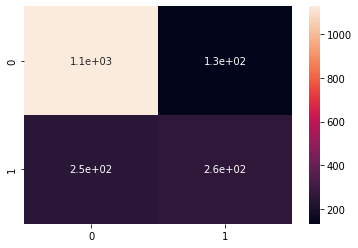

In [27]:
sbn.heatmap(confusion_matrix(ytest, ypred), annot=True)